In [1]:
import pandas as pd

from lending_club import execute_processing, train_test_split, create_model_pipeline, evaluate, plot_roc_curve

In [2]:
df = pd.read_csv("data/loan_data.csv", low_memory=False)

load_data: pd.DataFrame = execute_processing(df)

2024-08-01 - lending-club - INFO - Processing data...
2024-08-01 - lending-club - INFO - Filtering loan status...
2024-08-01 - lending-club - INFO - Filtering missing data...
2024-08-01 - lending-club - INFO - Filtering non unique values...
2024-08-01 - lending-club - INFO - Removing unnecessary columns...
2024-08-01 - lending-club - INFO - Mapping categorical columns...
2024-08-01 - lending-club - INFO - Applying transformation...
2024-08-01 - lending-club - INFO - Handling outliers...
2024-08-01 - lending-club - INFO - Creating dummies...
2024-08-01 - lending-club - INFO - Converting to upper case...


In [3]:
load_data.head()

,LOAN_AMNT,INSTALLMENT,GRADE,EMP_LENGTH,ANNUAL_INC,LOAN_STATUS,DTI,INQ_LAST_6MTHS,OPEN_ACC,REVOL_BAL,...,PURPOSE_MAJOR_PURCHASE,PURPOSE_MEDICAL,PURPOSE_MOVING,PURPOSE_OTHER,PURPOSE_RENEWABLE_ENERGY,PURPOSE_SMALL_BUSINESS,PURPOSE_VACATION,PURPOSE_WEDDING,TERM_36,TERM_60
0,5000.0,162.870,2,10,24000.0,0,23.84,1.0,3.0,13648.0,...,0,0,0,0,0,0,0,0,1,0
1,2500.0,71.235,3,0,30000.0,1,2.13,3.0,3.0,1687.0,...,0,0,0,0,0,0,0,0,0,1
2,2400.0,84.330,3,10,24000.0,0,8.72,2.0,3.0,2956.0,...,0,0,0,0,0,1,0,0,1,0
3,10000.0,339.310,3,10,49200.0,0,20.00,1.0,10.0,5598.0,...,0,0,0,1,0,0,0,0,1,0
4,3000.0,71.235,2,1,80000.0,0,17.94,0.0,15.0,27783.0,...,0,0,0,1,0,0,0,0,0,1


In [4]:
x_train, x_test, y_train, y_test = train_test_split(load_data)

2024-08-01 - lending-club - INFO - Split data into train and test sets...


In [5]:
model = create_model_pipeline()

2024-08-01 - lending-club - INFO - Creating model pipeline...


In [6]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['LOAN_AMNT', 'INSTALLMENT',
                                                   'ANNUAL_INC', 'DTI',
                                                   'FICO_AVG', 'INQ_LAST_6MTHS',
                                                   'OPEN_ACC', 'REVOL_BAL',
                                                   'REVOL_UTIL',
                                                   'TOTAL_ACC'])])),
                ('resampling', SMOTE(sampling_strategy=0.6)),
                ('classification', LogisticRegression(max_iter=1000))])

In [7]:
predictions = model.predict(x_test)
probabilities = model.predict_proba(x_test)[:, 1]

In [8]:
evaluate(y_test, predictions)

Accuracy: 0.7868646200301963
Confusion Matrix:
[[5822  995]
 [ 699  432]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      6817
           1       0.30      0.38      0.34      1131

    accuracy                           0.79      7948
   macro avg       0.60      0.62      0.61      7948
weighted avg       0.81      0.79      0.80      7948

Precision score is 0.3027330063069376
Recall score is 0.3819628647214854
f1-score is 0.3377638780297107


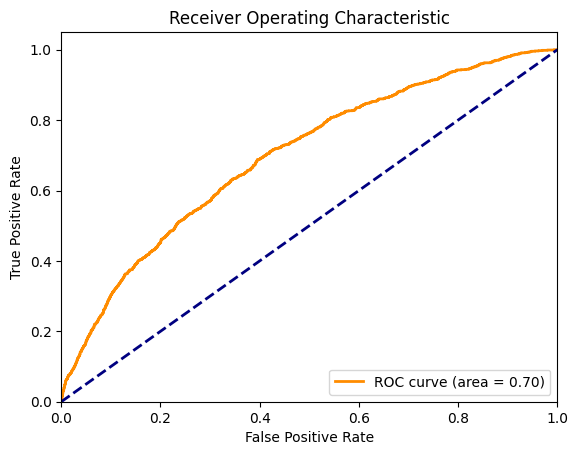

In [9]:
plot_roc_curve(y_test, probabilities)